In [11]:
from numpy import loadtxt, genfromtxt, shape, mean, sort, savetxt, size, array, copy
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, fill_between, legend, text, show
from sklearn.decomposition.pca import PCA
import pylab as plt
import numpy as np
import sys
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model


# Method

*Load and read data

*Design autoencoder Model

*Train Auto Encoder

*Use Encoder level from Auto Encoder

*Use Encoder to obtain reduced dimensionality data 

*Use decoder to obtain the reconstructed data 

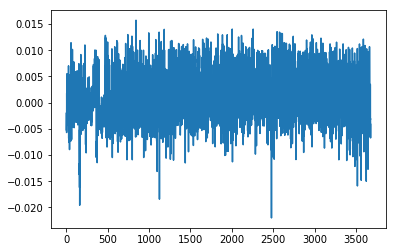

In [36]:
# read data
der1 = loadtxt('derivatives_all_epochs.dat').T
plt.plot(der1[0,:])
plt.show()

In [12]:

# read data
der = loadtxt('derivatives_all_epochs.dat')
# define the number of features
ncol = der.shape[1]
#scaling 
train_scaled = minmax_scale(der, axis = 0)
train_scaled

array([[0.44553315, 0.43131641, 0.42477467, ..., 0.17794776, 0.2001597 ,
        0.30509273],
       [0.52486403, 0.57206232, 0.6471093 , ..., 0.19707591, 0.22421777,
        0.34217618],
       [0.53202716, 0.56985123, 0.63743313, ..., 0.19090622, 0.21986387,
        0.34157339],
       ...,
       [0.50278944, 0.44346675, 0.38916569, ..., 0.19168508, 0.1512226 ,
        0.19642402],
       [0.40474287, 0.42636956, 0.46071532, ..., 0.17030293, 0.18984482,
        0.29578761],
       [0.47318716, 0.52624898, 0.54882663, ..., 0.14080449, 0.14300234,
        0.21909689]])

In [21]:
### Define the encoder dimension
encoding_dim = 4
#introducing an activation function
activation = 'sigmoid'

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(der, der, train_size = 0.7, random_state = 1)
#validation 

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size = 0.6, random_state = 1)

In [30]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(250, activation = activation)(input_dim)
encoded2 = Dense(210, activation = activation)(encoded1)
encoded3 = Dense(200, activation = activation)(encoded2)
encoded4 = Dense(190, activation = activation)(encoded3)
encoded5 = Dense(180, activation = activation)(encoded4)
encoded6 = Dense(170, activation = activation)(encoded5)
encoded7 = Dense(160, activation = activation)(encoded6)
encoded8 = Dense(158, activation = activation)(encoded7)
encoded9 = Dense(155, activation = activation)(encoded8)
encoded_middle = Dense(encoding_dim, activation = 'sigmoid')(encoded9)

# Decoder Layers
decoded0 = Dense(155, activation = activation)(encoded_middle)
decoded1 = Dense(158, activation = activation)(decoded0)
decoded2 = Dense(160, activation = activation)(decoded1)
decoded3 = Dense(170, activation = activation)(decoded2)
decoded4 = Dense(180, activation = activation)(decoded3)
decoded5 = Dense(190, activation = activation)(decoded4)
decoded6 = Dense(200, activation = activation)(decoded5)
decoded7 = Dense(210, activation = activation)(decoded6)
decoded8 = Dense(250, activation = activation)(decoded7)
decoded_out = Dense(ncol, activation = 'sigmoid')(decoded8)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded_out)
#
middle  = Model(inputs =input_dim, outputs = encoded_middle)


# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')   #'adadelta'

#
middle.compile(optimizer = 'adam', loss = 'binary_crossentropy')   #'adadelta'

In [31]:
#summary of the data

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 250)               74250     
_________________________________________________________________
dense_62 (Dense)             (None, 210)               52710     
_________________________________________________________________
dense_63 (Dense)             (None, 200)               42200     
_________________________________________________________________
dense_64 (Dense)             (None, 190)               38190     
_________________________________________________________________
dense_65 (Dense)             (None, 180)               34380     
_________________________________________________________________
dense_66 (Dense)             (None, 170)               30770     
__________

In [32]:
#Train Auto Encoder

autoencoder.fit(X_train, X_train, nb_epoch = 10, validation_data = (X_test, X_test))


/usr/lib/python3/dist-packages/ipykernel/__main__.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 1543 samples, validate on 1104 samples
Epoch 1/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.1257 - val_loss: 0.0048
Epoch 2/10
1543/1543 [==============================] - 2s 1ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 3/10
1543/1543 [==============================] - 2s 1ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/10
1543/1543 [==============================] - 2s 1ms/step - loss: 0.0015 - val_loss: 9.6542e-04
Epoch 5/10
1543/1543 [==============================] - 2s 1ms/step - loss: 7.4763e-04 - val_loss: 2.1855e-04
Epoch 6/10
1543/1543 [==============================] - 2s 1ms/step - loss: -2.7003e-06 - val_loss: -5.3848e-04
Epoch 7/10
1543/1543 [==============================] - 2s 1ms/step - loss: -7.6028e-04 - val_loss: -0.0013
Epoch 8/10
1543/1543 [==============================] - 2s 1ms/step - loss: -0.0014 - val_loss: -0.0019
Epoch 9/10
1543/1543 [==============================] - 2s 1ms/step - loss: -0.0020 - val_loss: -0.0024
Ep

In [33]:
#reduced data and its shape 

reduced_data150D=middle.predict(der)
print(reduced_data150D.shape,reduced_data150D)

(3677, 4) [[0.6288946  0.3451192  0.8059877  0.08919115]
 [0.6288946  0.3451192  0.8059878  0.08919117]
 [0.6288946  0.3451192  0.8059878  0.08919119]
 ...
 [0.6288946  0.34511927 0.8059877  0.08919117]
 [0.6288946  0.3451192  0.8059878  0.08919115]
 [0.6288946  0.34511927 0.8059877  0.08919115]]


In [34]:
#recontracted data and its shape
reconstructed150 = autoencoder.predict(der)
print(reconstructed150)

[[0.00083838 0.00239634 0.00362627 ... 0.00033576 0.00019729 0.00037359]
 [0.00083838 0.00239634 0.00362627 ... 0.00033576 0.00019729 0.00037359]
 [0.00083838 0.00239634 0.00362627 ... 0.00033576 0.00019729 0.00037359]
 ...
 [0.00083838 0.00239634 0.00362627 ... 0.00033576 0.00019729 0.00037359]
 [0.00083838 0.00239634 0.00362627 ... 0.00033576 0.00019729 0.00037359]
 [0.00083838 0.00239634 0.00362627 ... 0.00033576 0.00019729 0.00037359]]


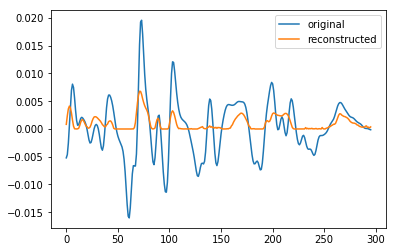

In [35]:
plt.plot(der[0,:],label='original')
plt.plot(reconstructed150[0,:],label='reconstructed')
plt.legend()
plt.show()